# 📖 XAI & Classification
- 캡스톤 스타트 23팀 inae park 🐻

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os

# root_dir = "PATH/TO/YOUR/DIRECTORY"
root_dir = "/content/gdrive/MyDrive/capstone_start"

# Checking if our specified directory exists
os.path.exists(root_dir)

True

# 📌 Install XAI Tool library
- captum
- details는 아래 link에서 확인
  - https://captum.ai/tutorials/

In [3]:
#!conda install captum -c pytorch
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

# 📌 XAI Lab 1
- Model
  - ResNet
- Task
  - Classification (Deep Learning)
- XAI (Attribution Algorithms Captum Supporting)
  - SmoothGrad for Robust Attribution

### TORCHVISION.MODELS
- https://pytorch.org/vision/0.9/models.html
- Classification Model
  - AlexNet
  - VGG
  - ResNet
  - SqueezeNet
  - DenseNet
  - Inception v3
  - GoogLeNet
  - ShuffleNet v2
  - MobileNetV2
  - MobileNetV3
  - ResNeXt
  - Wide ResNet
  - MNASNet

In [4]:
# Initial imports
import numpy as np
import torch

import torchvision
from torchvision import models
from torchvision import transforms

from captum.attr import IntegratedGradients, GradientShap, Occlusion, LayerGradCam
from captum.attr import visualization as viz
from captum.attr import NoiseTunnel

from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
model = models.resnet18(pretrained=True)

# 현재 model training을 하지는 않을거라 model training에 필요한 것들 비활성화
model = model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 127MB/s]


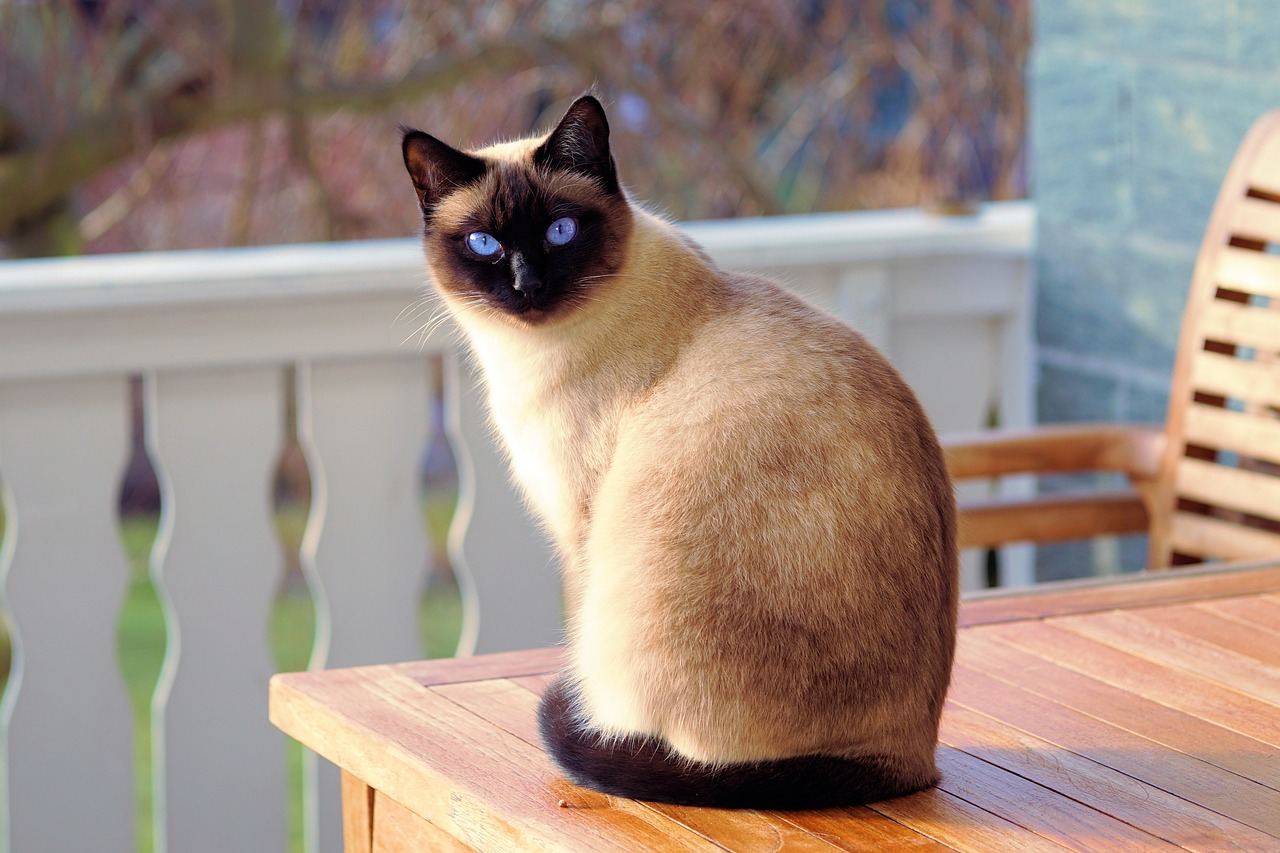

In [6]:
#img = Image.open('/<YOUR>/<LOCATION>/640px-YellowLabradorLooking_new.jpg')
img = Image.open(f'{root_dir}/Siamese-cat.jpg')
img

In [7]:
transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor()
])

transform_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )

transformed_img = transform(img)

input = transform_normalize(transformed_img)
input = input.unsqueeze(0)

### IMAGENET 1000 Class List
- https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
- Cat Class
   - 281	tabby, tabby cat
   - 282	tiger cat
   - 283	Persian cat
   - 284	Siamese cat, Siamese
   - 285	Egyptian cat

In [8]:
TARGET_LABEL_IDX = 284  # 샴 고양이 class
ZERO = torch.zeros(input.shape)

ig = IntegratedGradients(model)
attributions_ig = ig.attribute(input,
                               target=TARGET_LABEL_IDX,
                               n_steps=20,
                               baselines=ZERO,)

- Gradient-based attribution: **Integrated Gradient**
$$
\operatorname{IntegratedGrads~}_i(x)::=\left(x_i-x_i^{\prime}\right) \times \int_{\alpha=0}^1 \frac{\partial F\left(x^{\prime}+\alpha \times\left(x-x^{\prime}\right)\right)}{\partial x_i} d \alpha
$$


In [9]:
attributions_ig = np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1,2,0))
input_img = np.transpose(input.squeeze().cpu().detach().numpy(), (1,2,0))

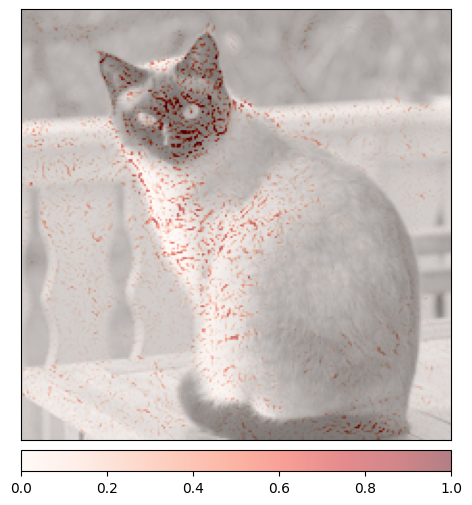

In [10]:
_ = viz.visualize_image_attr(attributions_ig,
                              input_img,
                              method="blended_heat_map",
                              cmap="Reds",
                              show_colorbar=True,
                              sign="positive",
                              outlier_perc=5)

# 📌 XAI Lab 2
- Model
  - ResNet
- Task
  - Classification (Deep Learning)
- XAI (Attribution Algorithms Captum Supporting)
  - SmoothGrad for Robust Attribution

In [11]:
nt = NoiseTunnel(ig)
attributions_ig_nt = nt.attribute(input,
                                  nt_samples=10,
                                  nt_type='smoothgrad_sq',
                                  stdevs=1.0,
                                  target=TARGET_LABEL_IDX)

In [12]:
attributions_ig_nt = np.transpose(attributions_ig_nt.squeeze().cpu().detach().numpy(), (1,2,0))
input_img = np.transpose(input.squeeze().cpu().detach().numpy(), (1,2,0))

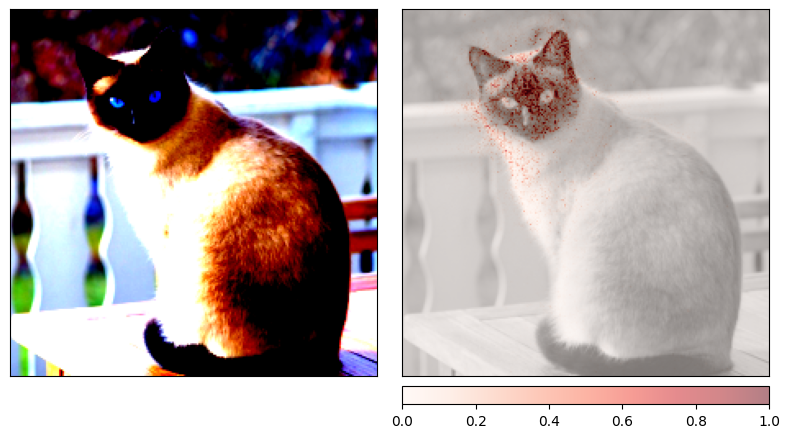

In [13]:
_ = viz.visualize_image_attr_multiple(attributions_ig_nt,
                                      input_img,
                                      methods=["original_image", "blended_heat_map"],
                                      cmap="Reds",
                                      show_colorbar=True,
                                      signs=["all", "positive"],
                                      outlier_perc=5)

# 📌 XAI Lab 3
- Model
  - ResNet
- Task
  - Classification (Deep Learning)
- XAI (Attribution Algorithms Captum Supporting)
  - Occulusion in Perturbation-based attribution

In [19]:
oc = Occlusion(model)
attributions_occ = oc.attribute(input,
                                sliding_window_shapes=(3, 15, 15),
                                strides = (3, 8, 8),
                                target=TARGET_LABEL_IDX,
                                baselines=0)

In [20]:
attributions_occ = np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1,2,0))

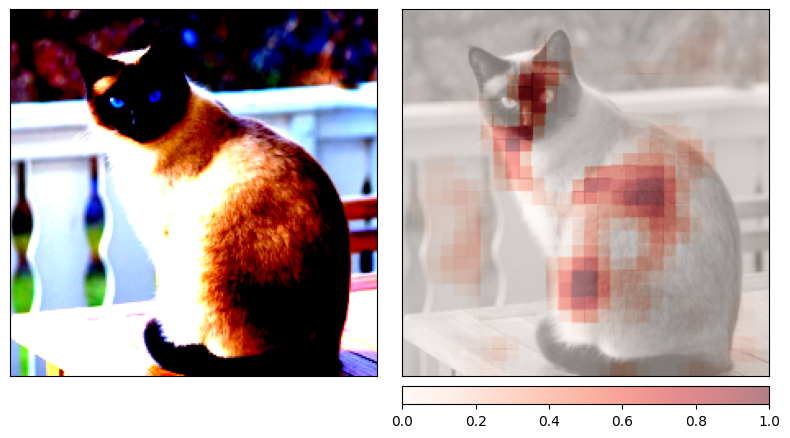

In [21]:
_ = viz.visualize_image_attr_multiple(attributions_occ,
                                      input_img,
                                      methods=["original_image", "blended_heat_map"],
                                      cmap="Reds",
                                      show_colorbar=True,
                                      signs=["all", "positive"],
                                      outlier_perc=5)

# 📌 XAI Lab 4
- Model
  - GoogLeNet
- Task
  - Classification (Deep Learning)
- XAI (Attribution Algorithms Captum Supporting)
  - Integrated Gradient in Gradient-based

In [22]:
googlenet = models.googlenet()

# 현재 model training을 하지는 않을거라 model training에 필요한 것들 비활성화
model = model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [23]:
TARGET_LABEL_IDX = 283  # 페르시안 고양이 class
ZERO = torch.zeros(input.shape)

ig = IntegratedGradients(model)
attributions_ig = ig.attribute(input,
                               target=TARGET_LABEL_IDX,
                               n_steps=20,
                               baselines=ZERO,)

In [24]:
attributions_ig = np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1,2,0))
input_img = np.transpose(input.squeeze().cpu().detach().numpy(), (1,2,0))

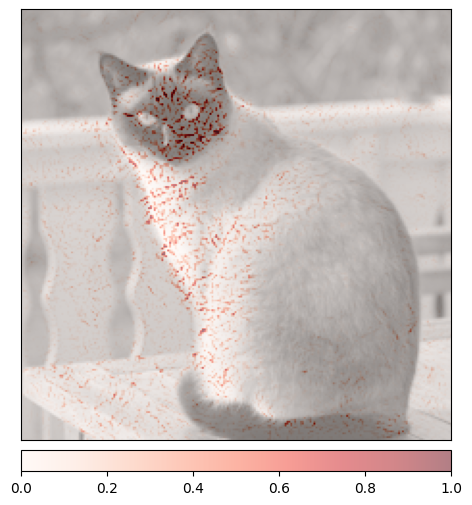

In [25]:
_ = viz.visualize_image_attr(attributions_ig,
                              input_img,
                              method="blended_heat_map",
                              cmap="Reds",
                              show_colorbar=True,
                              sign="positive",
                              outlier_perc=5)

# 📌 XAI Lab 5
- Model
  - GoogLeNet
- Task
  - Classification (Deep Learning)
- XAI (Attribution Algorithms Captum Supporting)
  - SmoothGrad for Robust Attribution

In [26]:
nt = NoiseTunnel(ig)
attributions_ig_nt = nt.attribute(input,
                                  nt_samples=10,
                                  nt_type='smoothgrad_sq',
                                  stdevs=1.0,
                                  target=TARGET_LABEL_IDX)

In [27]:
attributions_ig_nt = np.transpose(attributions_ig_nt.squeeze().cpu().detach().numpy(), (1,2,0))
input_img = np.transpose(input.squeeze().cpu().detach().numpy(), (1,2,0))

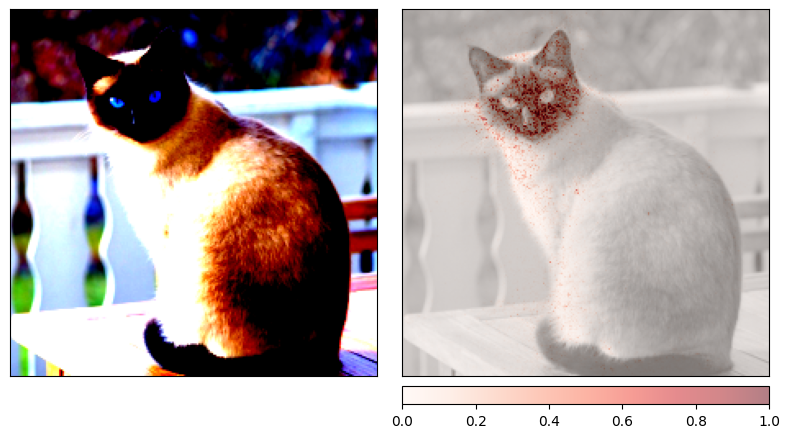

In [28]:
_ = viz.visualize_image_attr_multiple(attributions_ig_nt,
                                      input_img,
                                      methods=["original_image", "blended_heat_map"],
                                      cmap="Reds",
                                      show_colorbar=True,
                                      signs=["all", "positive"],
                                      outlier_perc=5)

# 📌 XAI Lab 6
- Model
  - GoogLeNet
- Task
  - Classification (Deep Learning)
- XAI (Attribution Algorithms Captum Supporting)
  - Occulusion in Perturbation-based attribution

In [29]:
oc = Occlusion(model)
attributions_occ = oc.attribute(input,
                                sliding_window_shapes=(3, 15, 15),
                                strides = (3, 8, 8),
                                target=TARGET_LABEL_IDX,
                                baselines=0)

In [30]:
attributions_occ = np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1,2,0))

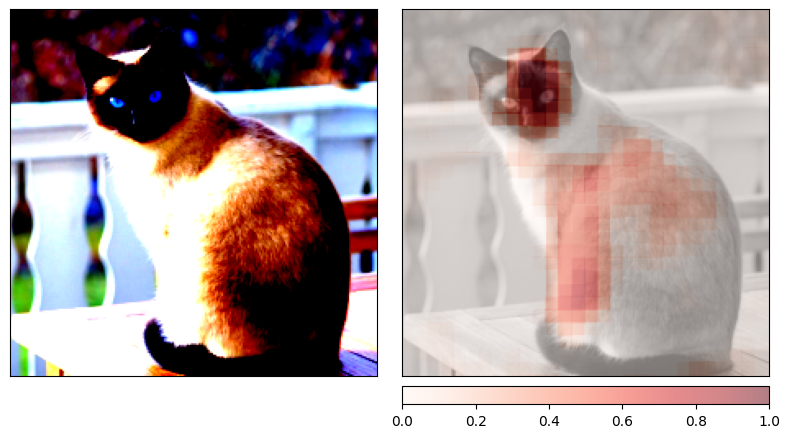

In [31]:
_ = viz.visualize_image_attr_multiple(attributions_occ,
                                      input_img,
                                      methods=["original_image", "blended_heat_map"],
                                      cmap="Reds",
                                      show_colorbar=True,
                                      signs=["all", "positive"],
                                      outlier_perc=5)